# Problem 03.09

## Problem:

For the prostate data available via the website, use both the Perceptron and
logistic regressor and compare the results.

## Solution:

### Perceptron:

Let's first import essential modules:

In [1]:
import numpy as np
import pylab as pl
import pcn
import os
import linreg
from sklearn.metrics import confusion_matrix, roc_curve, auc

Load the dataset:

In [2]:
os.chdir("../../../datasets/prostate data")
trainData = np.loadtxt("PROSTATE_TRAIN.TXT")
testData = np.loadtxt("PROSTATE_TEST.TXT")
os.chdir("../../textbook solutions/Machine Learning - an Algorithmic Perspective/practice questions/")

Visualize the data:

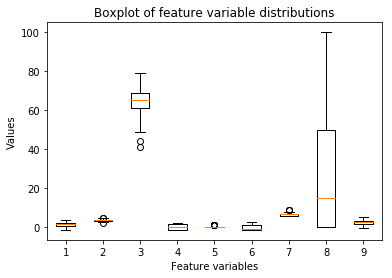

In [3]:
pl.boxplot(trainData)
pl.title("Boxplot of feature variable distributions")
pl.xlabel("Feature variables")
pl.ylabel("Values")
pl.show()

For feature variable #8, we will make any value that is above 60 equal to 60:

In [4]:
trainData[trainData[:, 7] > 60, 7] = 60

Visualize feature variable #8 to make sure previous step was successful:

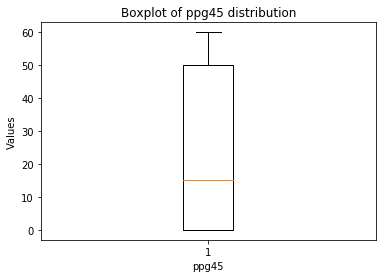

In [5]:
pl.boxplot(trainData[:, 7])
pl.title("Boxplot of ppg45 distribution")
pl.xlabel("ppg45")
pl.ylabel("Values")
pl.show()

Let's separate SVI from the rest of the data and use that variable as the label:

In [6]:
trainLabels = trainData[:, 4]
trainData_SVI = np.delete(trainData, 4, axis = 1)
testLabels = testData[:, 4]
testData_SVI = np.delete(testData, 4, axis = 1)

Train the model:

In [7]:
p = pcn.pcn(1, iter = 40000, thresh_type = "logistic", eta = 0.05)
output = np.squeeze(p.trainWeights(trainData_SVI, trainLabels))

/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/practice questions/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


Create a confusion matrix of the training data:

Total percentage correct: 86.57%

Confusion matrix:
[[44  8]
 [ 1 14]]




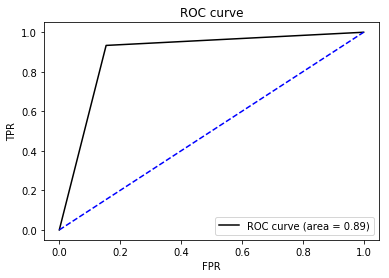

In [8]:
results_metrics = confusion_matrix(trainLabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = trainLabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(1)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

Now run the test data through the model:

In [9]:
output = np.squeeze(p.forwardPredict(testData_SVI))

/home/jlee/Documents/textbook solutions/Machine Learning - an Algorithmic Perspective/practice questions/pcn.py:64: RuntimeWarning: overflow encountered in exp
  yi = np.round(1/(1 + np.exp(-hij)), 2)


Create a confusion matrix of the test data:

Test set
Total percentage correct: 90.0%

Confusion matrix:
[[22  2]
 [ 1  5]]




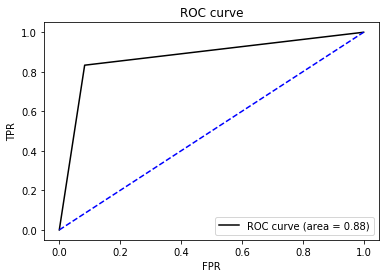

In [10]:
results_metrics = confusion_matrix(testLabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print("Test set")
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = testLabels, y_score = output)
flAUC = auc(arrFPR, arrTPR)
pl.figure(2)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

### Logistic regression:

There was no logistic regresion code introduced in this chapter, but we can run linear regression and then use the logit function to transform it into a binary variable. Using linear regression:

In [19]:
mdl = linreg.linreg()
output_LR = mdl.calcBeta(trainData_SVI, trainLabels)
output_LR = np.round(1/(1 + np.exp(-output_LR)), 2)
output_LR = np.where(outputs > 0.5, 1, 0)

Create a confusion matrix of the training data:

Total percentage correct: 91.04%

Confusion matrix:
[[49  3]
 [ 3 12]]




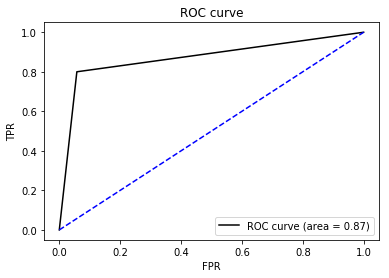

In [20]:
results_metrics = confusion_matrix(trainLabels, output_LR)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = trainLabels, y_score = output_LR)
flAUC = auc(arrFPR, arrTPR)
pl.figure(1)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()

Try the test data:

Create a confusion matrix of the test data:

Total percentage correct: 90.0%

Confusion matrix:
[[22  2]
 [ 1  5]]




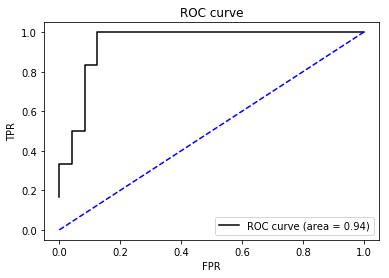

In [22]:
results_metrics = confusion_matrix(testLabels, output)
percCorrect = round(np.trace(results_metrics)/np.sum(results_metrics)*100, 2)

resultsStr = "Total percentage correct: " + str(percCorrect) + "%"
print(resultsStr)
print("\nConfusion matrix:")
print(results_metrics)

print("\n")
arrFPR, arrTPR, arrThresh = roc_curve(y_true = testLabels, y_score = output_LR)
flAUC = auc(arrFPR, arrTPR)
pl.figure(1)
pl.plot(arrFPR, arrTPR, label = "ROC curve (area = %0.2f)" % flAUC, color = "black")
pl.plot([0, 1], [0, 1], color = "blue", linestyle = "--")
pl.title("ROC curve")
pl.xlabel("FPR")
pl.ylabel("TPR")
pl.legend(loc = "lower right")
pl.show()